In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ast
from collections import defaultdict
import time
import osmnx as ox

In [31]:
file_people = '/home/aamad/Desktop/phd/berkeley/data/BOS/R_1/0_people7to24.csv'
edges_file = '/home/aamad/Desktop/phd/berkeley/data/carto/BOS/edges.csv'
nodes_file = '/home/aamad/Desktop/phd/berkeley/data/carto/BOS/nodes.csv'
dfpeople = pd.read_csv(file_people)#.loc[0]['init_intersection']
cartography = ox.load_graphml(filepath='/home/aamad/Desktop/phd/berkeley/data/carto/BOS/BOS_new_tertiary_simplified.graphml')
edges = pd.read_csv(edges_file)
nodes = pd.read_csv(nodes_file)
dfpeople
#plt.hist(pd.read_csv(file_people)['num_steps'], bins=100)

,p,init_intersection,end_intersection,time_departure,num_steps,co,gas,distance,a,b,T,avg_v(mph),active,last_time_simulated,path_length_cpu,path_length_gpu
0,0,61364734,61411539,25200.0,45,13.5136,52.0612,371.0,0.557041,2.90206,0.543303,18.5096,2,25244,4,4
1,1,7123407265,61589126,25255.0,186,46.8587,263.6250,2330.5,0.557041,2.90206,0.543303,27.7505,2,25441,10,10
2,2,61423451,61420860,25310.0,40,12.2224,49.2702,347.4,0.557041,2.90206,0.543303,18.0589,2,25350,5,5
3,3,61420765,994058433,25365.0,71,19.7136,80.7727,667.7,0.557041,2.90206,0.543303,20.8870,2,25436,9,9
4,4,61451202,61366391,25420.0,216,58.2411,304.4470,2482.8,0.557041,2.90206,0.543303,25.9115,2,25636,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518251,518251,66384965,66380936,28614.1,205,45.8622,267.4360,3178.5,0.557041,2.90206,0.543303,28.9718,2,28819,5,5
518252,518252,66370308,66379471,28649.7,228,50.9091,290.3530,2867.7,0.557041,2.90206,0.543303,28.1636,2,28877,3,3
518253,518253,66405142,66396300,28685.2,58,18.3309,65.4241,676.8,0.557041,2.90206,0.543303,17.1492,2,28743,5,5
518254,518254,66325249,5865625640,28720.8,84,22.9918,98.2745,935.0,0.557041,2.90206,0.543303,21.2972,2,28804,5,5


# n(t) HISTOGRAM

bigget - smallest time:  3592.5999999999985
time interval:  25
i 0
time interval:  25200.0   25225.0
i 1
time interval:  25225.0   25250.0
i 2
time interval:  25250.0   25275.0
i 3
time interval:  25275.0   25300.0
i 4
time interval:  25300.0   25325.0
i 5
time interval:  25325.0   25350.0
i 6
time interval:  25350.0   25375.0
i 7
time interval:  25375.0   25400.0
i 8
time interval:  25400.0   25425.0
i 9
time interval:  25425.0   25450.0
i 10
time interval:  25450.0   25475.0
i 11
time interval:  25475.0   25500.0
i 12
time interval:  25500.0   25525.0
i 13
time interval:  25525.0   25550.0
i 14
time interval:  25550.0   25575.0
i 15
time interval:  25575.0   25600.0
i 16
time interval:  25600.0   25625.0
i 17
time interval:  25625.0   25650.0
i 18
time interval:  25650.0   25675.0
i 19
time interval:  25675.0   25700.0
i 20
time interval:  25700.0   25725.0
i 21
time interval:  25725.0   25750.0
i 22
time interval:  25750.0   25775.0
i 23
time interval:  25775.0   25800.0
i 24
time i

<AxesSubplot: >

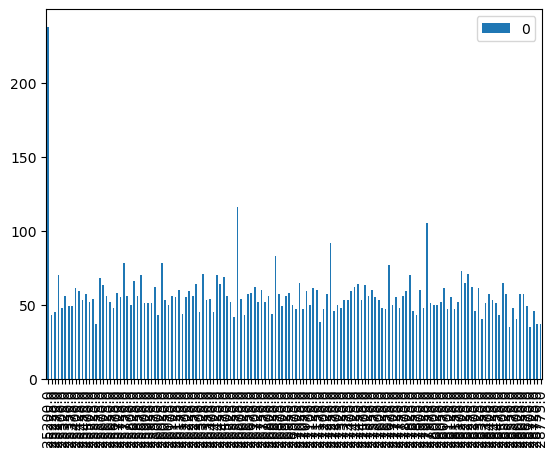

In [26]:
smallest_time = min(dfpeople['last_time_simulated'])
biggest_time = max(dfpeople['time_departure'])
iterations = 1000
time_interval = 25
#while((biggest_time-smallest_time)/time_interval>iterations):
#        time_interval += 100
print('bigget - smallest time: ',biggest_time - smallest_time)
print('time interval: ',time_interval)
timeintervals =np.arange(smallest_time, biggest_time, time_interval)

interval2npeople = {t:0 for t in timeintervals}
for i,t in enumerate(interval2npeople.keys()):
        if i < len(interval2npeople.keys())-1:
                print('i', i)
                print('time interval: ',t,' ', timeintervals[i+1])
#                t0 = time.time()
#                df_tmp = dfpeople.apply(lambda row: row['time_departure']>t,axis =1)              
                peopleinnet =  dfpeople.apply(lambda row: row['time_departure']>=t and row['last_time_simulated']<list(interval2npeople.keys())[i+1],axis=1)
                
#                print('number people in net: ',len([1 for p in peopleinnet if True==p]))
#                t1 = time.time()
#                print('time to filter people', t1-t0)        
#        peopleinnet = dfpeople[dfpeople['last_time_simulated']>t]
#        peopleinnet = peopleinnet[peopleinnet['time_departure']<list(interval2npeople.keys())[i+1]]
        interval2npeople[t] = len([1 for p in peopleinnet if True==p])

fig, ax = plt.subplots(1,1, figsize=(17,10))
pd.DataFrame.from_dict(interval2npeople, orient='index').plot(ax = ax,kind='bar')
#plt.plot(bins[:-1], n)

# n(t) FIT

[7.0, 7.006944444444445, 7.013888888888889, 7.020833333333333, 7.027777777777778, 7.034722222222222, 7.041666666666667, 7.048611111111111, 7.055555555555555, 7.0625, 7.069444444444445, 7.076388888888889, 7.083333333333333, 7.090277777777778, 7.097222222222222, 7.104166666666667, 7.111111111111111, 7.118055555555555, 7.125, 7.131944444444445, 7.138888888888889, 7.145833333333333, 7.152777777777778, 7.159722222222222, 7.166666666666667, 7.173611111111111, 7.180555555555555, 7.1875, 7.194444444444445, 7.201388888888889, 7.208333333333333, 7.215277777777778, 7.222222222222222, 7.229166666666667, 7.236111111111111, 7.243055555555555, 7.25, 7.256944444444445, 7.263888888888889, 7.270833333333333, 7.277777777777778, 7.284722222222222, 7.291666666666667, 7.298611111111111, 7.305555555555555, 7.3125, 7.319444444444445, 7.326388888888889, 7.333333333333333, 7.340277777777778, 7.347222222222222, 7.354166666666667, 7.361111111111111, 7.368055555555555, 7.375, 7.381944444444445, 7.388888888888889, 

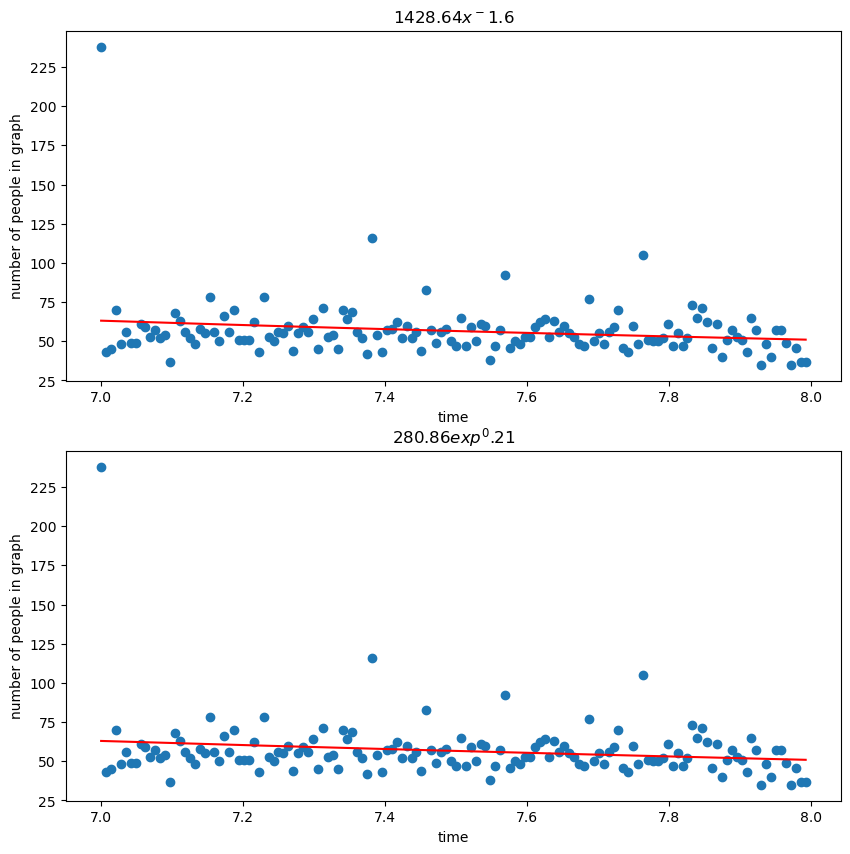

In [27]:
from FittingProcedures import *


int2people = defaultdict(list)
for t in interval2npeople.keys():
    if interval2npeople[t] != 0:
        int2people[t] = interval2npeople[t]
time = [t/3600 for t in list(int2people.keys())]
print(time)

# FITTING PROCEDURE -> POWER LAW
initial_guess_powerlaw = (6000,0.3)
fit = Fitting(time, list(int2people.values()), 'powerlaw', initial_guess_powerlaw)
# FITTING PROCEDURE -> EXPONENTIAL
initial_guess_expo = (list(int2people.values())[0],0.3)
fitexp = Fitting(time, list(int2people.values()), 'exponential', initial_guess_expo)
# PLOTTING PROCEDURE
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].scatter(time, int2people.values())
ax[0].plot(time, powerlaw(time, fit[0][0], fit[0][1]), color='red')
ax[0].set_xlabel('time')
ax[0].set_ylabel('number of people in graph')
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_title('${0}x^{1}$'.format(round(fit[0][0],2), round(fit[0][1],2)))

ax[1].scatter(time, int2people.values())
ax[1].plot(time, exponential(time, fitexp[0][0], fitexp[0][1]), color='red')
ax[1].set_xlabel('time')
ax[1].set_ylabel('number of people in graph')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_title('${0}exp^{1}$'.format(round(fitexp[0][0],2), round(fitexp[0][1],2)))

plt.show()

# INSERTION CURVE

518256


(array([64407., 16885., 18260., 21687., 19270., 22397., 25636., 18720.,
        17291., 29823., 18304., 24568., 18640., 28198., 15801., 20399.,
        22051., 18746., 20593., 19653., 17415., 15852., 14838.,  8822.]),
 array([7.        , 7.04158102, 7.08316204, 7.12474306, 7.16632407,
        7.20790509, 7.24948611, 7.29106713, 7.33264815, 7.37422917,
        7.41581019, 7.4573912 , 7.49897222, 7.54055324, 7.58213426,
        7.62371528, 7.6652963 , 7.70687731, 7.74845833, 7.79003935,
        7.83162037, 7.87320139, 7.91478241, 7.95636343, 7.99794444]),
 <BarContainer object of 24 artists>)

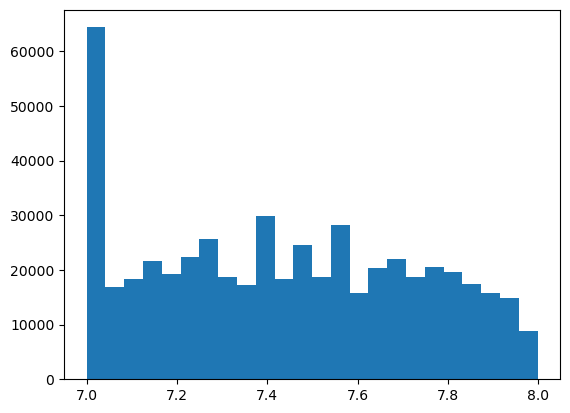

In [3]:
print(len(dfpeople))
time_dep = dfpeople['time_departure'].to_numpy()/3600
plt.hist(time_dep , bins = 24)

# TIME LENGTH DISTRIBUTION

Fitting powerlaw
(array([1.29730786e+04, 1.80197255e-08]), array([[2.24446821e+06, 4.49107865e+01],
       [4.49107865e+01, 1.23836345e-02]]))
powerlaw fit:  12973.07856981606   1.8019725533262172e-08
Convergence fit powerlaw:  False
Optimal parameters:  [1.31824804e+04 1.50764652e-02]
Message:  Desired error not necessarily achieved due to precision loss.


/home/aamad/Desktop/phd/berkeley/traffic_phase_transition/scripts/FittingProcedures.py:8: RuntimeWarning: divide by zero encountered in power
  return amp * (np.array(x)**index)
/home/aamad/anaconda3/envs/gt/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/aamad/Desktop/phd/berkeley/traffic_phase_transition/scripts/FittingProcedures.py:8: RuntimeWarning: divide by zero encountered in power
  return amp * (np.array(x)**index)
/home/aamad/Desktop/phd/berkeley/traffic_phase_transition/scripts/FittingProcedures.py:8: RuntimeWarning: divide by zero encountered in power
  return amp * (np.array(x)**index)
/home/aamad/anaconda3/envs/gt/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/aamad/Desktop/phd/berkeley/traffic_phase_transition/scripts/FittingProcedures.py:8: RuntimeWarning: divide by zero encountered in po

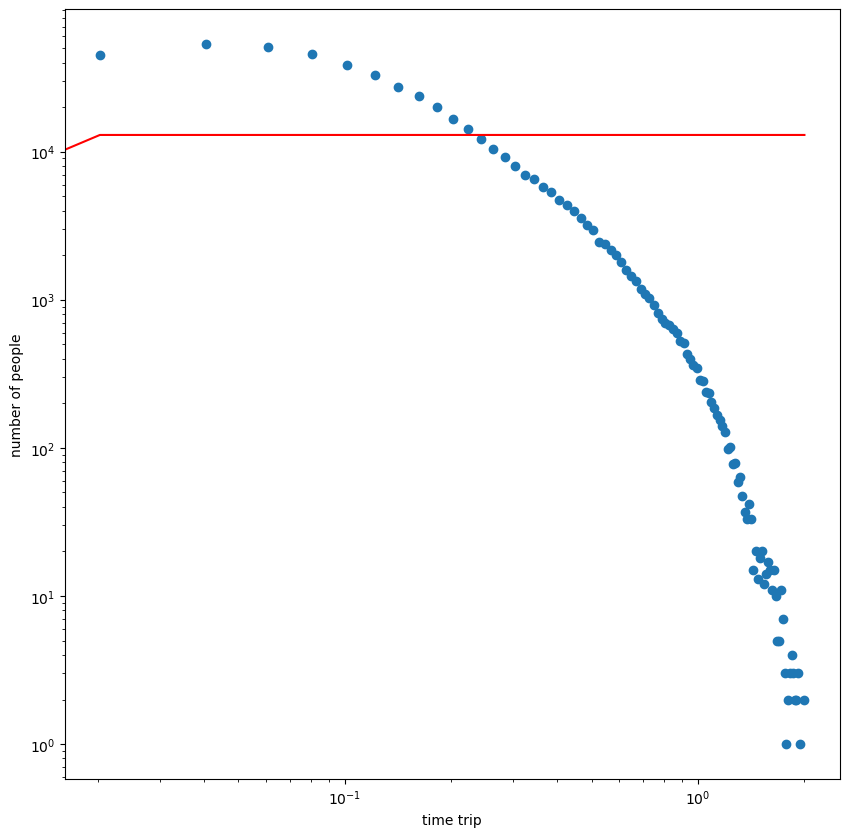

12973.07856981606 1.8019725533262172e-08
Fitting exponential
(array([5.38538598e+04, 5.22735841e+00]), array([[3.15995655e+06, 3.05583869e+02],
       [3.05583869e+02, 6.60697479e-02]]))
expo fit:  53853.85976245388   5.227358413620664
Convergence fit expo:  False
Optimal parameters:  [5.38531999e+04 5.22730877e+00]
Message:  Desired error not necessarily achieved due to precision loss.


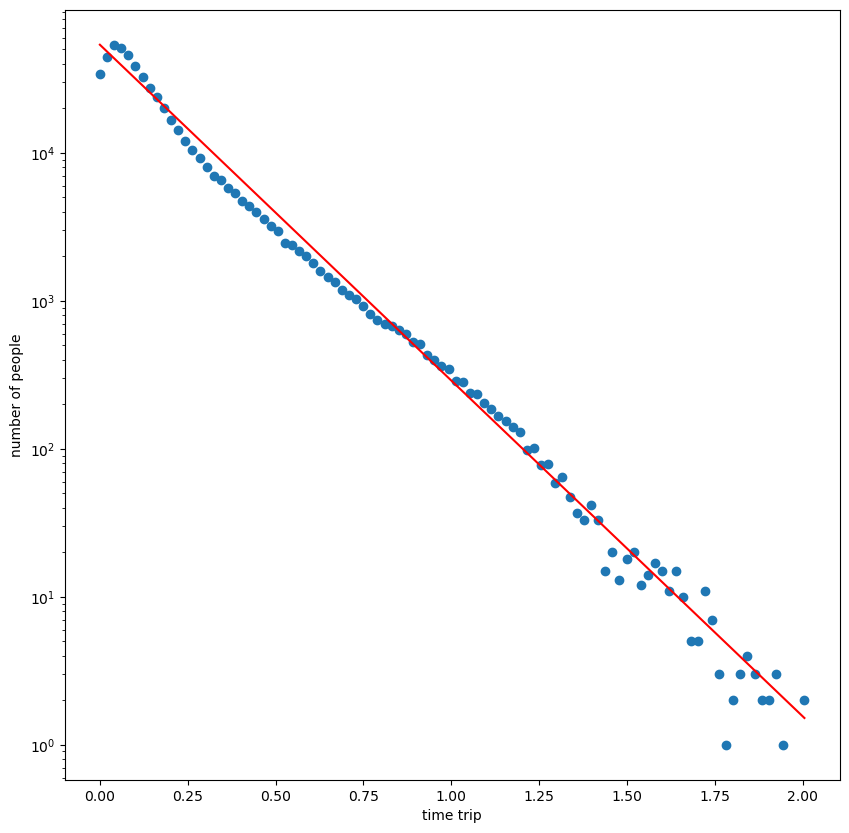

'Expected that there is a peak between 7 and 8 am. All the other bins should be empty.'

In [71]:
from FittingProcedures import *
feature2color = {'time':'red','distance':'green','veclocity':'yellow'}
def PlotDistributionFeatureTrajFit(bins,n,fit,feature2color,feature,FittingFunction):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    if FittingFunction == 'powerlaw':
        ax.scatter(bins[:-1], n,color = feature2color[feature])
        ax.plot(bins[:-1], powerlaw(bins[:-1], fit[0][0], fit[0][1]), color = feature2color[feature])
        ax.set_xlabel('{} trip'.format(feature))
        ax.set_ylabel('number of people')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title('{}'.format(feature))
    if FittingFunction == 'exponential':
        ax.scatter(bins[:-1], n,color = feature2color[feature])
        ax.plot(bins[:-1], exponential(bins[:-1], fit[0][0], fit[0][1]), color = feature2color[feature])
        ax.set_xlabel('{} trip'.format(feature))
        ax.set_ylabel('number of people')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title('{}'.format(feature))
    plt.show()    

#file = '/home/aamad/Desktop/phd/berkeley/data/carto/BOS/od_demand_7to8_R_162.csv'
#dfOD = pd.read_csv(file)
#print(dfOD)
n,bins = np.histogram(dfpeople['last_time_simulated'].to_numpy()/3600 - dfpeople['time_departure'].to_numpy()/3600,bins = 100)
initial_guess_powerlaw = (40000,0.3) 
fitpl = Fitting(bins[:-1], n,'powerlaw', initial_guess_powerlaw)
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(bins[:-1], n,color = )
ax.plot(bins[:-1], powerlaw(bins[:-1], fitpl[0][0], fitpl[0][1]), color='red')
ax.set_xlabel('time trip')
ax.set_ylabel('number of people')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('TIME')
plt.show()
print(fitpl[0][0], fitpl[0][1])
initial_guess_expo = (n[0],0.3)
fitexp = Fitting(bins[:-1], n,'exponential', initial_guess_expo)
PlotDistributionFeatureTrajFit(bins,n,fitexp,feature2color,'time','exponential')

'''Expected that there is a peak between 7 and 8 am. All the other bins should be empty.'''


# EXPECTED TIME DISTRIBUTION WITHOUT TRAFFIC

In [37]:
edges

,uniqueid,u,v,length,speed_mph,lanes,osmid_u,osmid_v
0,0,0,9,51.8,35,1,61816807,61819222
1,1,0,3,55.4,25,1,61816807,61817409
2,2,0,6,2223.4,35,1,61816807,61818775
3,3,1,10,1116.2,35,1,61817002,61819564
4,4,1,9,30.0,35,1,61817002,61819222
...,...,...,...,...,...,...,...,...
54946,54946,23464,23463,15.6,20,1,10281222833,10281222831
54947,54947,23465,23463,105.5,20,1,10281222839,10281222831
54948,54948,23466,23186,16.9,25,1,10844948681,72474574
54949,54949,23466,23165,95.0,50,1,10844948681,72330377


In [61]:
from multiprocessing import Pool
def read_peoplefile(filename):
    df = pd.read_csv(filename)
    return df
cartographml = '/home/aamad/Desktop/phd/berkeley/data/carto/BOS/BOS_new_tertiary_simplified.graphml'
file_routes = '/home/aamad/Desktop/phd/berkeley/data/BOS/R_1/0_route7to24.csv'
file_people = '/home/aamad/Desktop/phd/berkeley/data/BOS/R_1/0_people7to24.csv'

def ComputeTimeRoadWithoutTraffic(row):
    '''
        Computes the time it would take to go from point A to B without traffic.
        Is to be used with aplly in the edges dataframe.
    '''
    if 'speed_mph' in row.keys() and 'length' in row.keys():
        if not np.isnan(row['speed_mph']) and not np.isnan(row['length']):
            return row['length']/(row['speed_mph']/1.6)/1000
        else:
            row['length']/50/1000
    else:
        raise ValueError('speed_mph or length not in row.keys(): CHANGE DATAFRAME')
    
def IfInList(row,list_):
    return row['uniqueid'] in list_
class PersonMobility:
    def __init__(self,
                 id,
                 start_point,
                 traj,
                 end_point,
                 distance_traveled,
                 time_departure,
                 last_time,
                 av_vmph):
        self.id = id
        self.traj = [start_point]
        self.traj.extend(traj)
        self.traj.append(end_point)
        self.distance_traveled = distance_traveled
        self.time_departure = time_departure
        self.last_time = last_time
        self.av_vkmh = av_vmph/1.66
        pass

    def ComputeEstimatedTimeOnGraph(self, edges):
        '''
            Computes how much time the traveller would need to go from place A to B if each edge it travels is at the max speed
        '''
        time = 0
        edges['time_without_traffic'] = edges.apply(ComputeTimeRoadWithoutTraffic, axis=1)    
        if len(self.traj) == len(np.unique(self.traj)):
            time = np.sum(edges[edges['uniqueid'].isin(self.traj)]['time_without_traffic']) 
        else:
            edges['count_traj'] = edges['uniqueid'].apply(lambda x: self.traj.count(x))
            time  = np.sum(edges[edges['uniqueid'].isin(self.traj)].apply(lambda row: row['time_without_traffic']*row['count_traj']))                 
        self.EstimatedTimeOnGraph = time

class RouteMobility:
    def __init__(self,lines):
        return

def ParallelizeTimeOnGraph(Id2PeopleMobility,id_):
    ''' '''
    Id2PeopleMobility[id_].ComputeEstimatedTimeOnGraph(edges)

with open(file_routes, 'r') as f:
    lines = f.readlines()[1:]
dfpeople = read_peoplefile(file_people)
Id2PeopleMobility = defaultdict(list)
TotalTimeInNetPerPerson = []

ids = []
for line in lines:
    ll = line.split(':')
    Id2PeopleMobility[ll[0]] = PersonMobility(ll[0],
                                            dfpeople.iloc[int(ll[0])]['init_intersection'],
                                            ast.literal_eval(ll[1]), 
                                            dfpeople.iloc[int(ll[0])]['end_intersection'],
                                            ll[2], 
                                            dfpeople.iloc[int(ll[0])]['time_departure'],
                                            dfpeople.iloc[int(ll[0])]['last_time_simulated'],
                                            dfpeople.iloc[int(ll[0])]['avg_v(mph)']
                                            )     
    ids.append(ll[0])
    if int(ll[0])%1000 == 0:
        print('person ', ll[0], ' done')

arguments = [(Id2PeopleMobility,id_) for id_ in ids]
with Pool() as pool:
# Map the function to the arguments in parallel
    results = pool.starmap(ParallelizeTimeOnGraph, arguments)

TotalTimeInNetPerPerson = [Id2PeopleMobility[id_].EstimatedTimeOnGraph for id_ in ids]

#ParallelizeTimeOnGraph(Id2PeopleMobility,id_)
n,bins = np.histogram(dfpeople['last_time_simulated'].to_numpy()/3600 - dfpeople['time_departure'].to_numpy()/3600,bins = 100)
initial_guess_expo = (n[0],0.3)
fitexp = Fitting(bins[:-1], n,'exponential', initial_guess_expo)
n1,bins1 = np.histogram(TotalTimeInNetPerPerson,bins = 100)
initial_guess_expo = (n1[0],0.3)
fitexp1 = Fitting(bins1[:-1], n1,'exponential', initial_guess_expo)
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(bins[:-1], n,color = 'red')
ax.scatter(bins1[:-1], n1,color = 'blue')
ax.plot(bins[:-1], exponential(bins[:-1], fitexp[0][0], fitexp[0][1]), color='red')
ax.plot(bins1[:-1], exponential(bins1[:-1], fitexp1[0][0], fitexp1[0][1]), color='blue')
ax.set_xlabel('time trip')
ax.set_ylabel('number of people')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(['Simulation','Estimated without traffic'])
plt.show()





person  0  done
person  1000  done
person  2000  done
person  3000  done
person  4000  done
person  5000  done
person  6000  done
person  7000  done
person  8000  done
person  9000  done
person  10000  done
person  11000  done
person  12000  done
person  13000  done
person  14000  done
person  15000  done
person  16000  done
person  17000  done
person  18000  done
person  19000  done
person  20000  done
person  21000  done
person  22000  done
person  23000  done
person  24000  done
person  25000  done
person  26000  done
person  27000  done
person  28000  done
person  29000  done
person  30000  done
person  31000  done
person  32000  done
person  33000  done
person  34000  done
person  35000  done
person  36000  done
person  37000  done
person  38000  done
person  39000  done
person  40000  done
person  41000  done
person  42000  done
person  43000  done
person  44000  done
person  45000  done
person  46000  done
person  47000  done
person  48000  done
person  49000  done
person  50000

/home/aamad/anaconda3/envs/gt/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/aamad/anaconda3/envs/gt/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/aamad/anaconda3/envs/gt/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axi

KeyboardInterrupt: 

In [64]:
TotalTimeInNetPerPerson = [Id2PeopleMobility[id_].EstimatedTimeOnGraph for id_ in ids]

#ParallelizeTimeOnGraph(Id2PeopleMobility,id_)
n,bins = np.histogram(dfpeople['last_time_simulated'].to_numpy()/3600 - dfpeople['time_departure'].to_numpy()/3600,bins = 100)
initial_guess_expo = (n[0],0.3)
fitexp = Fitting(bins[:-1], n,'exponential', initial_guess_expo)
n1,bins1 = np.histogram(TotalTimeInNetPerPerson,bins = 100)
initial_guess_expo = (n1[0],0.3)
fitexp1 = Fitting(bins1[:-1], n1,'exponential', initial_guess_expo)
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(bins[:-1], n,color = 'red')
ax.scatter(bins1[:-1], n1,color = 'blue')
ax.plot(bins[:-1], exponential(bins[:-1], fitexp[0][0], fitexp[0][1]), color='red')
ax.plot(bins1[:-1], exponential(bins1[:-1], fitexp1[0][0], fitexp1[0][1]), color='blue')
ax.set_xlabel('time trip')
ax.set_ylabel('number of people')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(['Simulation','Estimated without traffic'])
plt.show()


AttributeError: 'PersonMobility' object has no attribute 'EstimatedTimeOnGraph'

In [70]:
for k in Id2PeopleMobility.keys():
    print(Id2PeopleMobility[k].__dict__)
    break

{'id': '0', 'traj': [61364734.0, 15354, 30356, 29906, 16496, 61411539.0], 'distance_traveled': '371\n', 'time_departure': 25200.0, 'last_time': 25244.0, 'av_vkmh': 11.150361445783133}
